<a href="https://colab.research.google.com/github/Clalva02/TFG/blob/main/TFG_RedNeuronalPropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from enum import Enum
from matplotlib import pyplot as plt
import random
!pip install pandas 
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
print(type(X_train),type(Y_train),type(X_test),type(Y_test))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(Y_train[1:100])

[0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0
 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3
 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [ ]:
def vectorized_result(j):
  e = np.zeros((10, 1))
  e[j] = 1.0
  return e
X_train=np.reshape(X_train,(60000,28*28,1))/255
X_test=np.reshape(X_test,(10000,28*28,1))/255
Y_train =np.array([vectorized_result(y) for y in Y_train])
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
print(type(X_train),type(Y_train),type(X_test),type(Y_test))

(60000, 784, 1) (60000, 10, 1) (10000, 784, 1) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
test_data =list(zip(X_test, Y_test))
training_data = list(zip(X_train, Y_train))
random.shuffle(training_data)
random.shuffle(test_data)

In [ ]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def dsigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))
class Neuralnetwork(object):
  def __init__(self,forma):
    self.ncapas = len(forma)
    self.forma = forma
    self.biases = [np.random.randn(y, 1) for y in forma[1:]]#vector de bias
    self.weights = [np.random.randn(y, x) for x, y in zip(forma[:-1], forma[1:])]#matriz de weights
    #La funcion init es la primera uqe se lleva a cabo
    #En la funcion init hacemos que el programa almacene el numero de capas y de neuronas que hay en la red, y generamos los pesos y biases de
    #cada neurona, escepto para la primera pues esta es la de los imputs
    

  def regresion(self,a):
    for b, w in zip(self.biases, self.weights):
      a = sigmoid(np.dot(w,np.asfarray(a,float))+b)
    return a
    #definimos la neurona de forma que toma los valores a preexistentes provenientes de las neurona anterior y aplica la regresion lineal con los w y b
    # definidos en el init  ademas aplica la funcion de activación que aporta el caracter no lineal

  def backprop(self,x,y):#los imputs de la funcion son los imputs y los outputs que entrenan el programa
    #creamos los vectores donde vamos a almacenar las variaciones que vamos a aplicar a los pesos y los biases
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    #introducimos los datos(inputs)
    activation = x
    activations = [x]#guardandolos en un array en el que la primera columna van a ser los datos de entrada
    #y creamos un array donde guardar los valores de la regresion lineal
    zs = []
    #en el bucle damos los valores de z(regresion) y de a, una vez aplicada la funcion de activación
    for b, w in zip(self.biases, self.weights):
      z = np.dot(w, activation)+b
      zs.append(z)
      activation = sigmoid(z)
      activations.append(activation)#guardamos en columnas los nuevos datos
    #calculamos la variacion con la formula de la propagacion lineal con los valores de la ultima columna de a y z
    delta = self.cost_derivative(activations[-1], y) * dsigmoid(zs[-1])
    #y calculamos la variación que aplicaremos a la w y b
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    for l in range(2, self.ncapas):#en el resto de columnas hacemos la propagacion hacia atras
      z = zs[-l]
      sp = dsigmoid(z)
      delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
      nabla_b[-l] = delta
      nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
      return (nabla_b, nabla_w)
    #programamos el stocastic gradient descendant en el que tenemos que introducir los datos de entrenamiento, las epoch(el numero de veces que vamos a iterar),
    #el tamaño de los grupos que vamos a utilizar para la aproximacion del gradient descendent, la tasa de aprendizaje eta y en caso de datos para el testdata
  
  def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):#training data son los datos de entrada/input x y su clasificacion/output y
    p=[]
    if test_data: n_test = len(test_data)
    n = len(training_data)
    for j in range(epochs):
      random.shuffle(training_data)#mexclamos los datos de entrenamiento
      mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]#los dividimos en mini lotes
      for mini_batch in mini_batches:
        self.update_mini_batch(mini_batch, eta)#actualizamos los pesos y los bias
      if test_data:#si hay test data vamos viendo como evalua los datos 
        print( "Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
        p.append(self.evaluate(test_data))
      else:
        print("Epoch {0} complete".format(j))
    return p

  def update_mini_batch(self, mini_batch, eta):#con esta funcion implantamos la backpropagation en el SGD
  #primero creamos los vectores vacios que contendran los incrementos de los b y w
      nabla_b = [np.zeros(b.shape) for b in self.biases]
      nabla_w = [np.zeros(w.shape) for w in self.weights]
      for x, y in mini_batch:#tomando los valores (imput,output) dentro de cada minibatch
          delta_nabla_b, delta_nabla_w = self.backprop(x, y)#aplicamos la propgacion hacia atras y se la sumamos a vectores vacios
          nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
          nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
      self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]#modificamos el total de los pesos con la formula del SGD
      self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
  
  #definimos la funcion para evaluar los datos test
  def evaluate(self, test_data):
      test_results = [(np.argmax(self.regresion(x)), y) for (x, y) in test_data]
      return sum(int(x == y) for (x, y) in test_results)

  #la derivada de la funcion de coste
  def cost_derivative(self, output_activations, y):
      return (output_activations-y)

In [ ]:
net = Neuralnetwork([28*28, 100, 10])
p=net.SGD(training_data, 30, 100, 1, test_data=test_data)

Epoch 0: 3935 / 10000
Epoch 1: 4823 / 10000
Epoch 2: 5313 / 10000
Epoch 3: 5422 / 10000
Epoch 4: 5485 / 10000
Epoch 5: 5521 / 10000
Epoch 6: 5537 / 10000
Epoch 7: 5565 / 10000
Epoch 8: 5577 / 10000
Epoch 9: 5605 / 10000
Epoch 10: 5610 / 10000
Epoch 11: 5614 / 10000
Epoch 12: 5622 / 10000
Epoch 13: 5622 / 10000
Epoch 14: 5636 / 10000
Epoch 15: 5641 / 10000
Epoch 16: 5647 / 10000
Epoch 17: 5653 / 10000
Epoch 18: 5665 / 10000
Epoch 19: 5660 / 10000
Epoch 20: 5669 / 10000
Epoch 21: 5670 / 10000
Epoch 22: 5675 / 10000
Epoch 23: 5683 / 10000
Epoch 24: 5686 / 10000
Epoch 25: 5691 / 10000
Epoch 26: 5694 / 10000
Epoch 27: 5699 / 10000
Epoch 28: 5713 / 10000
Epoch 29: 5704 / 10000


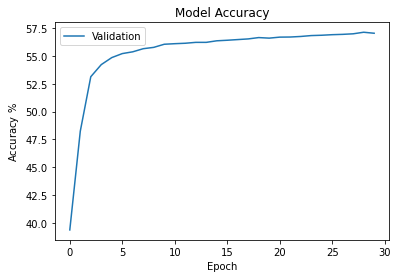

In [ ]:
P=np.array(p)/10000*100
plt.plot(P)
plt.title('Model Accuracy')
plt.ylabel('Accuracy $\%$')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [ ]:
net2 = Neuralnetwork([28*28, 200, 100, 10])
m=net2.SGD(training_data, 30, 100, 1, test_data=test_data)

Epoch 0: 3955 / 10000
Epoch 1: 5074 / 10000
Epoch 2: 5306 / 10000
Epoch 3: 5673 / 10000
Epoch 4: 6057 / 10000
Epoch 5: 6177 / 10000
Epoch 6: 6401 / 10000
Epoch 7: 6979 / 10000
Epoch 8: 7065 / 10000
Epoch 9: 7139 / 10000
Epoch 10: 7168 / 10000
Epoch 11: 7222 / 10000
Epoch 12: 7243 / 10000
Epoch 13: 7268 / 10000
Epoch 14: 7301 / 10000
Epoch 15: 7291 / 10000
Epoch 16: 7323 / 10000
Epoch 17: 7347 / 10000
Epoch 18: 7364 / 10000
Epoch 19: 7367 / 10000
Epoch 20: 7381 / 10000
Epoch 21: 7390 / 10000
Epoch 22: 7401 / 10000
Epoch 23: 7408 / 10000
Epoch 24: 7411 / 10000
Epoch 25: 7414 / 10000
Epoch 26: 7414 / 10000
Epoch 27: 7433 / 10000
Epoch 28: 7442 / 10000
Epoch 29: 7446 / 10000


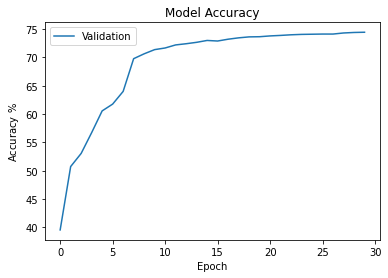

In [ ]:
M=np.array(m)/10000*100
plt.plot(M)
plt.title('Model Accuracy')
plt.ylabel('Accuracy $\%$')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [ ]:
net3 = Neuralnetwork([28*28, 100, 10])
o=net3.SGD(training_data, 30, 100, 0.1, test_data=test_data)

Epoch 0: 2188 / 10000
Epoch 1: 2760 / 10000
Epoch 2: 3179 / 10000
Epoch 3: 3605 / 10000
Epoch 4: 3886 / 10000
Epoch 5: 4208 / 10000
Epoch 6: 4540 / 10000
Epoch 7: 4867 / 10000
Epoch 8: 5130 / 10000
Epoch 9: 5363 / 10000
Epoch 10: 5547 / 10000
Epoch 11: 5649 / 10000
Epoch 12: 5753 / 10000
Epoch 13: 5809 / 10000
Epoch 14: 5858 / 10000
Epoch 15: 5913 / 10000
Epoch 16: 5947 / 10000
Epoch 17: 5985 / 10000
Epoch 18: 6019 / 10000
Epoch 19: 6047 / 10000
Epoch 20: 6068 / 10000
Epoch 21: 6094 / 10000
Epoch 22: 6119 / 10000
Epoch 23: 6151 / 10000
Epoch 24: 6165 / 10000
Epoch 25: 6183 / 10000
Epoch 26: 6191 / 10000
Epoch 27: 6203 / 10000
Epoch 28: 6209 / 10000
Epoch 29: 6230 / 10000


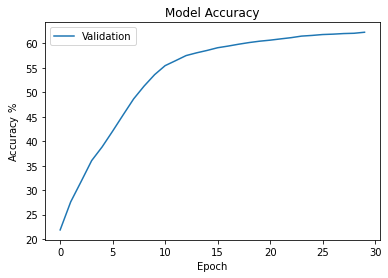

In [ ]:
O=np.array(o)/10000*100
plt.plot(O)
plt.title('Model Accuracy')
plt.ylabel('Accuracy $\%$')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

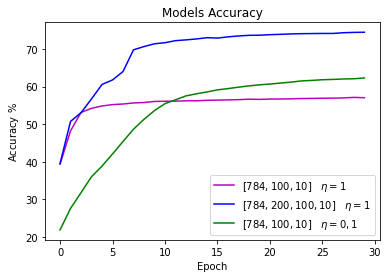

In [ ]:
plt.plot(P, 'm-', label=r'$[784,100,10]$   $\eta=1$')
plt.plot(M, 'b-', label=r'$[784,200,100,10]$   $\eta=1$')
plt.plot(O, 'g-', label=r'$[784,100,10]$   $\eta=0,1$')
plt.title('Models Accuracy')
plt.ylabel('Accuracy $\%$')
plt.xlabel('Epoch')
plt.legend( loc='lower right')
plt.show()